### Load Data into Pandas

In [58]:
import pandas as pd
import numpy as np 
data = pd.read_csv('AmesHousing.txt', delimiter="\t")

In [59]:
data.shape

(2930, 82)

### Split it to two datasets for training and testing

In [60]:
train = data[0:1465]
test = data[1465:]

In [61]:
train.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [62]:
# select propriate factors to predict target 'SalesPrice'
train.corr()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.216328,-0.023680,-0.019325,0.020872,-0.041658,0.075087,-0.119430,-0.061310,-0.032150,...,-0.065138,0.035970,0.010772,0.006036,0.024285,0.020456,-0.020989,0.236713,-0.930052,-0.061739
PID,0.216328,1.000000,-0.015730,-0.096721,0.022772,-0.270909,0.107144,-0.383475,-0.152703,-0.273287,...,-0.036688,-0.064917,0.172182,-0.043257,-0.024153,-0.023788,-0.005618,-0.065983,0.096558,-0.255002
MS SubClass,-0.023680,-0.015730,1.000000,-0.461707,-0.248502,0.053806,-0.099594,0.031106,0.050029,0.003763,...,-0.035436,0.000737,0.009916,-0.051714,-0.065821,-0.022679,-0.023673,-0.007913,0.000633,-0.089036
Lot Frontage,-0.019325,-0.096721,-0.461707,1.000000,0.416683,0.188143,-0.058701,0.111760,0.084779,0.221436,...,0.086661,0.109933,-0.004848,0.052725,0.048335,0.047041,0.017995,0.001942,0.005173,0.363887
Lot Area,0.020872,0.022772,-0.248502,0.416683,1.000000,0.100720,-0.010617,0.032295,0.024338,0.080788,...,0.110173,0.044055,0.001900,0.022026,0.053951,0.010426,0.025364,0.001240,-0.005044,0.274966
Overall Qual,-0.041658,-0.270909,0.053806,0.188143,0.100720,1.000000,-0.085393,0.606321,0.566943,0.432761,...,0.259457,0.319684,-0.173999,0.032201,0.021969,0.072038,-0.010059,-0.003679,-0.076838,0.805201
Overall Cond,0.075087,0.107144,-0.099594,-0.058701,-0.010617,-0.085393,1.000000,-0.356125,0.082959,-0.147267,...,0.045431,-0.013964,0.053380,0.034101,0.065052,-0.013368,0.047523,0.017998,-0.032946,-0.100926
Year Built,-0.119430,-0.383475,0.031106,0.111760,0.032295,0.606321,-0.356125,1.000000,0.578105,0.334825,...,0.247952,0.191199,-0.404700,0.039274,-0.035171,0.027459,-0.028919,-0.021330,-0.006263,0.592749
Year Remod/Add,-0.061310,-0.152703,0.050029,0.084779,0.024338,0.566943,0.082959,0.578105,1.000000,0.204852,...,0.237615,0.262482,-0.228615,0.024440,-0.049195,0.023000,-0.021166,-0.019780,-0.012875,0.546442
Mas Vnr Area,-0.032150,-0.273287,0.003763,0.221436,0.080788,0.432761,-0.147267,0.334825,0.204852,1.000000,...,0.129184,0.152851,-0.111321,0.027523,0.049831,0.086580,-0.013599,0.012528,-0.062750,0.516090


###  Data Visulization 

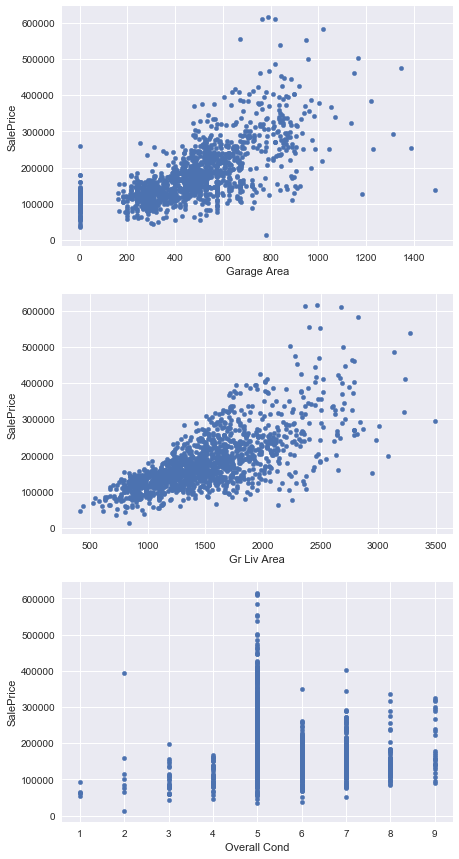

In [65]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,15))

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

train.plot(x="Garage Area", y="SalePrice", ax=ax1, kind="scatter")
train.plot(x="Gr Liv Area", y="SalePrice", ax=ax2, kind="scatter")
train.plot(x="Overall Cond", y="SalePrice", ax=ax3, kind="scatter")

plt.show()

### Using apply function to get standard deviation of columns I'll use

In [57]:
train[[ 'Gr Liv Area', 'Overall Cond', 'SalePrice']].apply(lambda x: np.std(x))

Gr Liv Area       469.093213
Overall Cond        1.154385
SalePrice       78373.264179
dtype: float64

### drop null value

In [56]:
train[[ 'Gr Liv Area', 'Overall Cond', 'SalePrice']].dropna()

,Gr Liv Area,Overall Cond,SalePrice
0,1656,5,215000
1,896,6,105000
2,1329,6,172000
3,2110,5,244000
4,1629,5,189900
5,1604,6,195500
6,1338,5,213500
7,1280,5,191500
8,1616,5,236500
9,1804,5,189000


### Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train[[ 'Gr Liv Area', 'Overall Cond']], train['SalePrice'])
print(lr.coef_)
print(lr.intercept_)

a0 = lr.intercept_
a1 = lr.coef_

[ 116.72959444 -435.26028777]
8062.47990045


### Predict for testing dataset

In [68]:
lr = LinearRegression()
lr.fit(train[['Gr Liv Area', 'Overall Cond']], train['SalePrice'])
from sklearn.metrics import mean_squared_error

train_predictions = lr.predict(train[[ 'Gr Liv Area', 'Overall Cond']])
test_predictions = lr.predict(test[[ 'Gr Liv Area', 'Overall Cond']])

train_mse = mean_squared_error(train_predictions, train['SalePrice'])
test_mse = mean_squared_error(test_predictions, test['SalePrice'])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

56003.0047002
57098.0883163
